<a href="https://colab.research.google.com/github/ggyupi/PCVK_Ganjil_2025/blob/main/GammaCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob, os

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 4


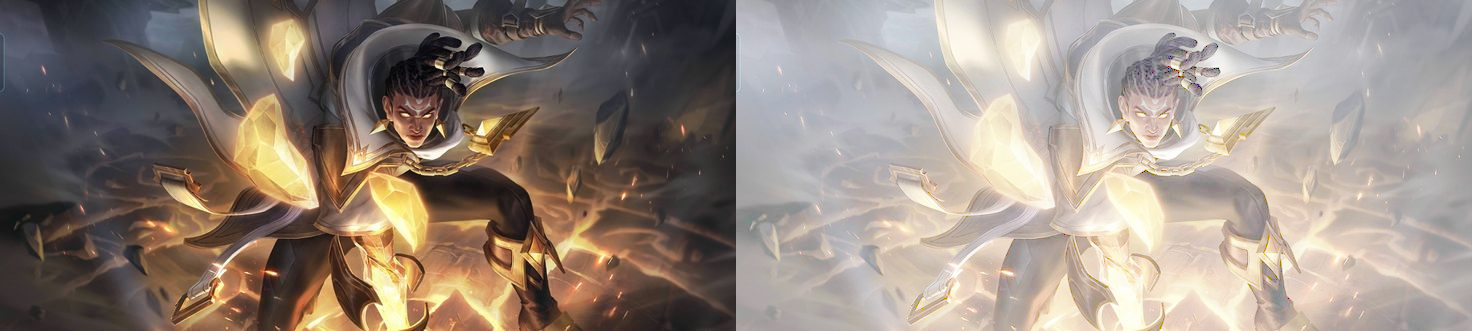

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0   # default kalau error

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/brody1.jpg')

# Normalisasi ke 0..1
img_float = original.astype(np.float32) / 255.0

# Rumus gamma correction: I' = 255 * (I/255)^(1/gamma)
gamma_corrected = np.power(img_float, 1.0 / gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

# Gabungkan hasil sebelum & sesudah
final_frame = cv.hconcat([original, gamma_corrected])
cv2_imshow(final_frame)


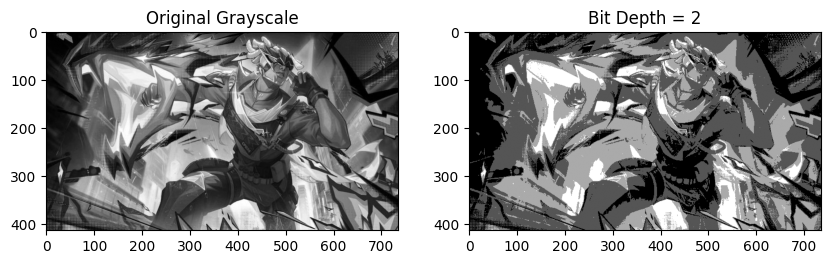

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Set bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Baca gambar dalam grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/brody2.jpg', cv.IMREAD_GRAYSCALE)


# Proses quantization
quantized = np.round(original / level) * level
quantized = quantized.astype(np.uint8)

# Tampilkan pakai matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title('Original Grayscale')

plt.subplot(1,2,2)
plt.imshow(quantized, cmap='gray')
plt.title(f'Bit Depth = {bit_depth}')

plt.show()


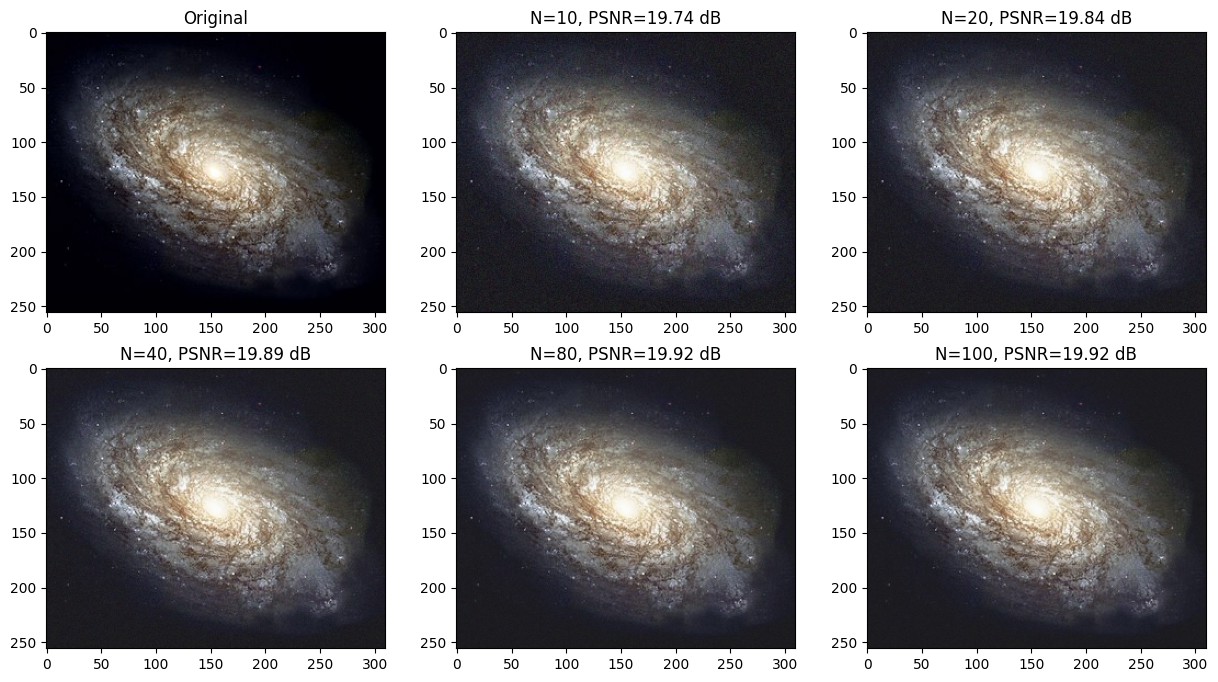

Tabel PSNR Average Denoising:
N	PSNR (dB)
10	19.74
20	19.84
40	19.89
80	19.92
100	19.92


In [16]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt

# --- Baca citra asli ---
ori = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
ori = cv.cvtColor(ori, cv.COLOR_BGR2RGB)

# --- Baca 100 citra noise ---
files = sorted(glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'))
cv_img = []
for img in files:
    n = cv.imread(img)
    n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
    cv_img.append(n.astype(np.float32))   # simpan dalam float32

cv_img = np.array(cv_img)

# --- Fungsi PSNR ---
def psnr(target, ref):
    target = target.astype(np.float32)
    ref = ref.astype(np.float32)
    mse = np.mean((target - ref) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# --- Average Denoising ---
def average_denoising(imgs, N):
    avg = np.mean(imgs[:N], axis=0)                # rata-rata N citra
    return np.clip(avg, 0, 255).astype(np.uint8)   # konversi ke citra normal

# --- Ambil hasil untuk 10,20,40,80,100 ---
counts = [10, 20, 40, 80, 100]
results = {}
for c in counts:
    denoised = average_denoising(cv_img, c)
    score = psnr(denoised, ori)
    results[c] = (denoised, score)

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(ori)
plt.title("Original")

for i, c in enumerate(counts, start=2):
    plt.subplot(2,3,i)
    plt.imshow(results[c][0])
    plt.title(f"N={c}, PSNR={results[c][1]:.2f} dB")

plt.show()

print("Tabel PSNR Average Denoising:")
print("N\tPSNR (dB)")
for c in counts:
    print(f"{c}\t{results[c][1]:.2f}")


Dari hasil PSNR di atas, kesimpulan yang dapat diambil adalah

1. Semakin Banyak Citra, Semakin Baik Kualitas Citra:
Secara umum, terjadi peningkatan nilai PSNR seiring dengan bertambahnya jumlah citra ber-derau (noisy images) (N) yang digunakan untuk proses perataan (averaging).

PSNR adalah metrik yang mengukur kualitas rekonstruksi citra, di mana nilai PSNR yang lebih tinggi menunjukkan kualitas citra yang lebih baik (lebih sedikit derau/noise dan lebih mendekati citra asli).

Hal ini konsisten dengan prinsip Average Denoising, di mana rata-rata dari derau acak (seperti Gaussian noise) yang independen cenderung mendekati nol seiring dengan bertambahnya sampel yang dirata-ratakan, sehingga menghasilkan citra yang lebih bersih.

2. Peningkatan Mulai Melambat:
Meskipun terjadi peningkatan, laju peningkatannya mulai melambat setelah N=40.

Peningkatan dari N=10 ke N=20 adalah 0.10 dB.

Peningkatan dari N=40 ke N=80 hanya 0.03 dB.

Nilai PSNR pada N=80 dan N=100 adalah sama (19.92 dB).

3. Hukum Pengembalian yang Berkurang (Diminishing Returns):
Kesamaan nilai PSNR pada N=80 dan N=100 menunjukkan bahwa penambahan jumlah citra di atas titik tertentu (N besar) memberikan sedikit atau bahkan tidak ada manfaat tambahan yang signifikan dalam peningkatan kualitas citra (berdasarkan metrik PSNR). Dengan kata lain, ada titik di mana biaya komputasi untuk memproses lebih banyak citra tidak sebanding dengan peningkatan kualitas yang didapat.

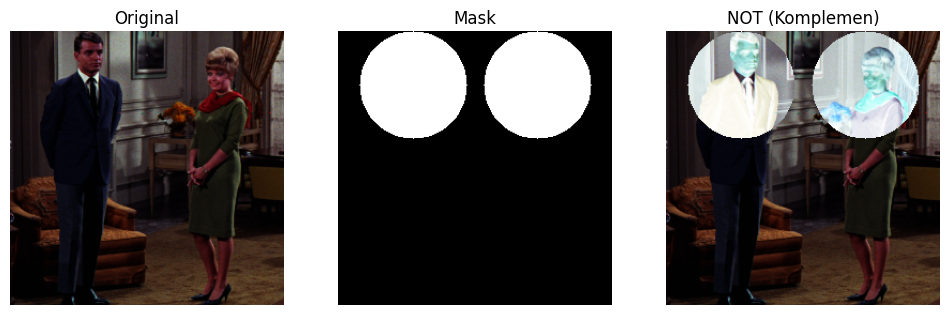

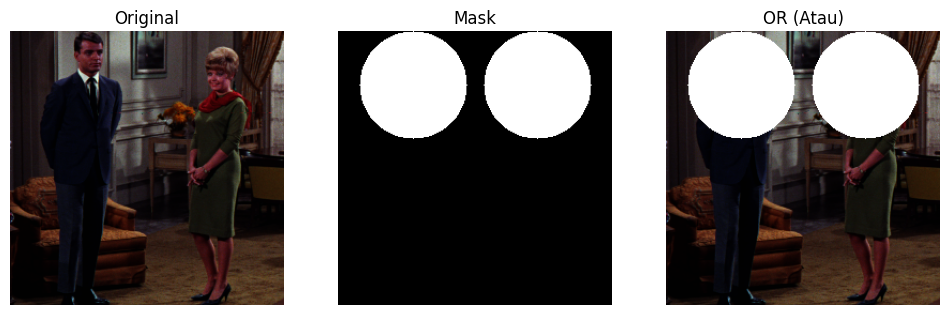

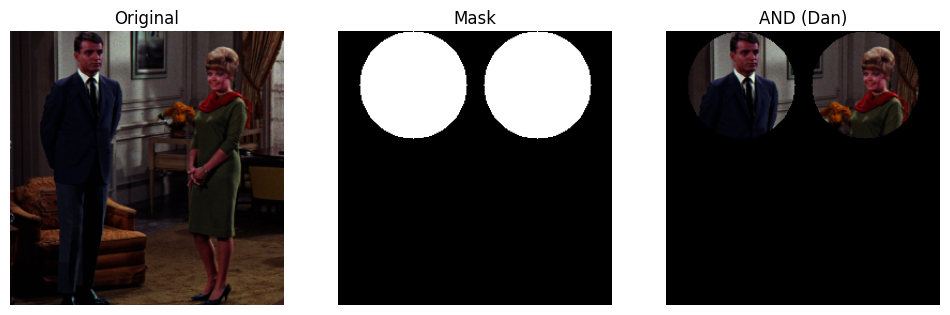

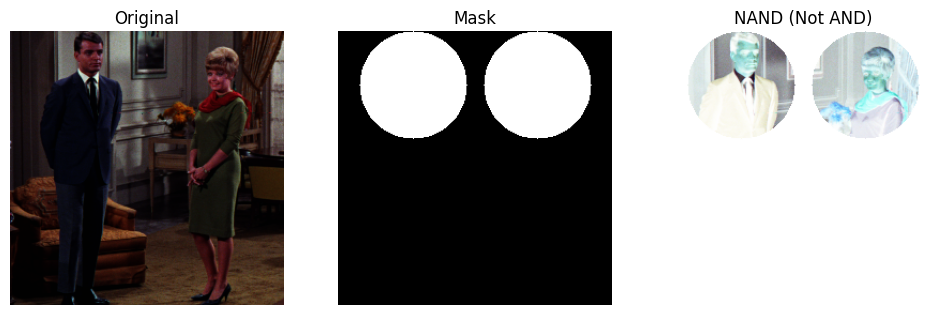

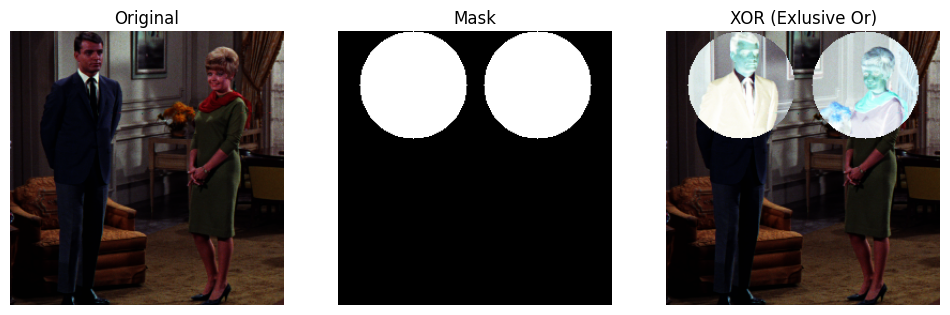

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
h, w = mask.shape
cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (186,50 ), 50, 255, -1)

mask_rgb = cv.merge([mask, mask, mask])

not_result = img.copy()
not_result = cv.bitwise_not(not_result, not_result, mask=mask)

or_result = cv.bitwise_or(img, mask_rgb)

and_result = cv.bitwise_and(img, mask_rgb)

nand_result = cv.bitwise_not(and_result)

xor_result = cv.bitwise_xor(img, mask_rgb)

def show_images(title, original, mask, result):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(original); plt.title("Original"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(mask, cmap='gray'); plt.title("Mask"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(result); plt.title(title); plt.axis("off")
    plt.show()

show_images("NOT (Komplemen)", img, mask, not_result)
show_images("OR (Atau)", img, mask, or_result)
show_images("AND (Dan)", img, mask, and_result)
show_images("NAND (Not AND)", img, mask, nand_result)
show_images("XOR (Exlusive Or)", img, mask, xor_result)


Tuliskan hasil analisa anda:

Operasi logika bitwise pada citra sangat efektif untuk memanipulasi dan mengisolasi area tertentu menggunakan masker biner. Hasil dari berbagai operasi ini menunjukkan fungsi yang spesifik: AND berfungsi sebagai alat utama untuk ekstraksi Region of Interest (ROI), secara efektif memotong citra dan hanya menampilkan piksel di dalam batas masker, sementara mengubah sisanya menjadi hitam. Sebaliknya, operasi OR digunakan untuk menyorot area masker dengan warna putih solid. Operasi NOT berfungsi untuk menginversi (negatif) warna citra hanya di area masker. Terakhir, kombinasi NAND menghasilkan inversi dari potongan citra dengan latar belakang putih, sedangkan XOR menghasilkan citra negatif di dalam masker dengan latar belakang hitam. Secara keseluruhan, pemahaman tentang operasi bitwise ini sangat penting karena memungkinkan manipulasi piksel yang presisi untuk tujuan masking, segmentasi, dan komputasi citra lanjutan.